# Calculus

For a long time, how to calculate the area of a circle remained a mystery. Then, in Ancient Greece, the mathematician Archimedes came up with the clever idea to inscribe a series of polygons with increasing numbers of vertices on the inside of a circle.

For a polygon with *n* vertices, we obtain *n* triangles. The height of each triangle approaches the radius *r* as we partition the circle more finely. At the same time, its base approaches 2𝜋𝑟/𝑛, since the ratio between arc and secant approaches 1 for a large number of vertices. Thus, the area of the polygon approaches *n* * *r* * 1/2(2𝜋𝑟/𝑛) = 𝜋𝑟<sup>2</sup>. This can also be described as finding the area of a circle by a limit procedure. 

This limit procedure is at the root of both **differential calculus** and **integral calculus**. The former can tell us how to increase or decrease a function's value by manipulating its arguments. This comes in handy for the *optimization problems* that we face in deep learning, where we repeatedly update our paramters in order to decrease the loss function. Optimization addresses how to fit our models to training data, and calculus is its key prerequisite. However, it's important not to forget that our ultimate goal is to perform well on **previously unseen** data. That problem is called **generalization**. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline

## Derivatives and Differentiation

Simply put, a **derivative** is a rate of change in a function with respect to changes in its arguments. Derivatives can tell us how rapidly a loss function would increase or decrease were we to increase or decrease each parameter by an infintesimally small amount. Formally, for functions f: R --> R, that map from scalars to scalars, the derivative of f at a point x is defined as f<sup>'</sup>(x) = lim<sub>h->0</sub> f(x + h) - f(x) / h

This term on the right hand side is called a **limit** and it tells us what happens to the value of an expression as a specified variable approaches a particular value. This limit tells us what the ratio between a pertubation *h* and the change in the function value f(x + h) - f(x) converges to as we shrink its size to zero. 

When f<sup>'</sup>(x) exists, f is said to be **differentiable** at x: and when *f*<sup>'</sup>(x) exists for all x on a set, e.g., the interval [a,b], *we say that *f is differentiable on this set.* Not all functions are differentiable, including many that we wish to optimize, such as accuracy and the area under the receiving operating characteristic (AUC). However, because computing the derivative of the loss is a crucial step in nearly all algorithms for training deep neural networks, we often optimize a **differentiable surrogate** instead. 

We can interpret the derivative f<sup>'</sup>(x) as the **instantaneous rate of change** of f(x) with respect to x. Let's solidify our understanding with an example. Let's define u = f(x) = 3x<sup>2</sup> - 4x.

In [2]:
def f(x):
    return 3 * x ** 2 - 4 * x

Setting x = 1, we see that f(x + h) - f(x) / h approaches 2 as h approaches 0. While this experiment lacks the rigor of a mathematical proof, we can quickly see that indeed f<sup>'</sup>(1) = 2

In [3]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


There are several equivalent notational conventions for derivatives. Given y = f(x), the following expressions are equivalent: f<sup>'</sup>(x) = y<sup>'</sup> = (dy / dx) = (df / dx) = (d / dx) f(x) = Df(x) = D<sub>x</sub>f(x),

where the symbols d / dx and D are **differentiation operators**. Below, we present the derivatives of some common functions:

(d / dx)C = 0

(d / dx)x<sup>n</sup> = nx<sup>n - 1</sup> for n ≠ 0

(d / dx)e<sup>x</sup> = e<sup>x</sup>

(d / dx)ln x = x<sup>-1</sup>

Functions composed from differentiable functions are often themselves differentiable. The following rules come in handy for working with compositions of any differetial functions f and g, and constant C. See the **Constant multiple rule**, the **Sum rule**, the **Product rule**, and the **Quotient rule**. 

Using this, we can apply the rules to find the derivative of 3x<sup>2</sup> - 4x via: (d / dx)[3x<sup>2</sup> - 4x] = 3(d / dx)x<sup>2</sup> - 4(d / dx)x = 6x - 4.

Plugging in x = 1 shows that, indeed, the derivative equals 2 at this location. Not that derivatives tell us the **slope** of a function at a particular location. 

## Visualization Utilities

We can visualize the slopes of functions using the `matplotlib` library. We need to define a few functions. As its name indicates, `use_svg_display` tells `matplotlib` to output graphics in SVG format for crisper images. 

In [4]:
def use_svg_display():
    """Set the figure size for matplotlib."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

Conveniently, we can set figure sizes with `plt.rcParams['figure.figsize'] = figsize` 

In [5]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim), axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

The `set_axes` function can associate axes with properties, including labels, ranges, and scales.

With these three functions, we can definite a `plot` function to overlay multiple curves. Much of the code here is just ensuring that the sizes and shapes of the inputs match. 

In [6]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None, 
        ylim=None, xscale='linear', yscale='linear', 
        fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points"""
    
    if isinstance(X, np.ndarray) and X.ndim == 1:
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif isinstance(Y, np.ndarray) and Y.ndim == 1:
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    
    plt.figure(figsize=figsize)
    if axes is None:
        axes = plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x, y, fmt) if len(x) else axes.plot(y, fmt)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if xlim:
        axes.set_xlim(xlim)
    if ylim:
        axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
    plt.show

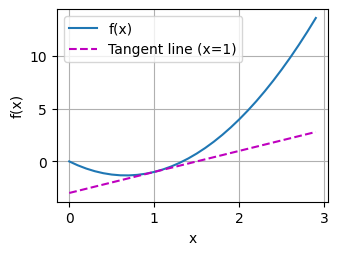

In [7]:
x = np.arange(0, 3, 0.1)
y = f(x)
tangent_line = 2 * x - 3

plot(x, [y, tangent_line], xlabel='x', ylabel='f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## Partial Derivatives and Gradients

So far, we've been differentiating functions of just one variable. In deep learning, we need to be able to work with functions of *many* variables. Let's briefly touch on the basics of the derivative related to **multivariate** functions. 

Let y = f(x<sub>1</sub>,x<sub>2</sub>, . . .,x<sub>n</sub>) be a function with *n* variables. The **partial derivative** of y with respect to its i<sup>th</sup> parameter x<sub>i</sub> is:

(𝜕𝑦 / 𝜕x<sub>i</sub>) = lim<sub>h-->0</sub> f(x<sub>1</sub>, . . .,x<sub>i - 1</sub>, x<sub>i</sub> + h, x<sub>i + 1</sub>, . . .,x<sub>n</sub>) - f(x<sub>1</sub>, . . .,x<sub>i</sub>, . . .,x<sub>n</sub>) / h

To calculate (𝜕𝑦 / 𝜕x<sub>i</sub>), we can treat x<sub>1</sub>, . . .,x<sub>i - 1</sub>, x<sub>i + 1</sub>, . . .,x<sub>n</sub> as constants and calculate the derivative of y with respect to x<sub>i</sub>. The following notational conventions for partial derivatives are all common and all mean the same thing: 

(𝜕𝑦 / 𝜕x<sub>i</sub>) = (𝜕f / 𝜕x<sub>i</sub>) = 𝜕<sub>x<sub>i</sub></sub>f = 𝜕<sub>i</sub>f = f<sub>x<sub>i</sub></sub> = f<sub>i</sub> = D<sub>i</sub>f = D<sub>x<sub>i</sub></sub>f.

We can concatenate partial derivatives of a multivariate function with respect to all its variables to obtain a vector that is called the **gradient** of the function. Suppose that the input of function f : R<sup>n</sup> --> R is an n-dimensional vector **x** = [x<sub>1</sub>,x<sub>2</sub>, . . .,x<sub>n</sub>]<sup>T</sup> and the output is a scalar. The gradient of the function f with respect to x is a vector of n partial derivatives:

∇<sub>x</sub>f(**x**) = [𝜕<sub>x<sub>1</sub></sub>f(**x**),𝜕<sub>x<sub>2</sub></sub>f(**x**), . . . 𝜕<sub>x<sub>n</sub></sub>f(**x**)]<sup>T</sup>

When there is no ambiguity, ∇<sub>x</sub>f(**x**) is typically replaced by ∇f(**x**). The following rules come in handy for differentiating multivariate functions:

1) For all **A** ∈ R<sup>m x n</sup> we have  ∇<sub>x</sub>**Ax** = **A**<sup>T</sup> and ∇<sub>x</sub>X<sup>T</sup>**A** = **A**.

2) For square matrices **A** ∈ R<sup>m x n</sup> we have that ∇<sub>x</sub>X<sup>T</sup>**Ax** = (**A** + **A**<sup>T</sup>)x and in particular ∇<sub>x</sub>||X||<sup>2</sup> = ∇<sub>x</sub>X<sup>T</sup>**x** = 2**x**.

Similarly, for any matrix **X**, we have ∇<sub>x</sub>||**X**||<sup>2</sup><sub>F</sub> = 2**X**

## The Chain Rule

In deep learning, the gradients of concern are often difficult to calculate because we are working with deeply nested functions(of functions(of functions...)). Fortunately for us, **the chain rule** of calculus takes care of this. 

Recalling functions of a single variable, suppose that y = f(g(x)) and the underlying function y = f(u) and u = g(x) are both differentiable. The chain rule states that: 

(dy / dx) = (dy / du) * (du / dx)

Returning to the notion of multivariate functions, suppose that y = f(**u**) has variables u<sub>1</sub>, u<sub>2</sub>, . . .,u<sub>m</sub>, where each u<sub>i</sub> = g<sub>i</sub>(**x**) has variables x<sub>1</sub>, x<sub>2</sub>, . . .,x<sub>n</sub>, i.e., **u** = g(**x**). Then the chain rule states that:

(𝜕𝑦 / 𝜕x<sub>i</sub>) = (𝜕𝑦 / 𝜕u<sub>1</sub>) * (𝜕u<sub>1</sub> / 𝜕x<sub>i</sub>) + (𝜕𝑦 / 𝜕u<sub>2</sub>) * (𝜕u<sub>2</sub> / 𝜕x<sub>i</sub>) + . . . + (𝜕𝑦 / 𝜕u<sub>m</sub>) * (𝜕u<sub>m</sub> / 𝜕x<sub>i</sub>)

and so ∇<sub>x</sub>y = **A**∇<sub>u</sub>y, where **A** ∈ R<sup>n x m</sup> is a matrix that contains the derivative of vector **u** with respect to the vector **x**. Thus, evaluating the gradient requires computing a vector-matrix product. This is one of the key reasons why linear algebra is such an integral building block for deep learning systems. 

## Calculus Recap

We've only scratched the surface of the incredibly deep topic that is calculus, however the relevance of some concepts should be starting to click. The composition of rules for differentiation can be applied routinely, enabling us to compute gradients *automatically* without any particular creativity on our part. Moreover, computing the derivatives of vector-valued functions requires us to multiply matrices as we trace the dependency graph of variables from output to input. 

This graph is traversed in a **forward** direction when we evaluate the function and in a **backwards** direction when we compute gradients. We're starting to rub up against the concept of **backpropagation**, a computational way of applying the chain rule of calculus. 

With regards to optimization, gradients allow us to determine how to move the parameters of a model in order to lower the loss, and each step of the optimization algorithms used throughout this book will require calculating the gradient. 

# Automatic Differentiation

Despite the relative straightforwardness of calculating derivatives, doing so by hand is tedious and subject to human-induced errors and it only get's worse the more complex a given model becomes. Fortunately all modern deep learning frameworks have what's called **automatic differentiation**, also known as **autograd**. 

As we pass data through each successive function, the framework builds a **computational graph** that tracks how each value depends on others. To calculate derivatives, autograd works backwards through this graph by applying the chain rule. The computational algorithm for applying the chain rule like this is the aforementioned **backpropaagation**. 

While most autograd implementations themselves are quite modern, they do have a somewhat long history to them. The earliest references to autograd date back to Wengert (1964). The core ideas behind more modern backpropagation date to a PhD thesis from 1980 (Speelpenning, 1980) and were further developed in the late 1980s (Griewank, 1989). Backpropagation has become the default method for computing gradients, but it's technically not the only option. For example, the programming language Julia employs *forward propagation* (Revels et al.,  2016). 

Let's try to cement our understanding of autograd as implemented in PyTorch's library. 

In [8]:
import torch

Let's assume that we're interested in differentiating the function y = 2**x**<sup>T</sup>**x** with respect to the column vector **x**. To begin, we assign x an initial value

In [9]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

Before we start calculating the gradient of y with respect to **x**, we need a place to store it. Generally speaking, we avoid allocating new memory every time we take a derivative because deep learning requires successively computing derivatives with respect to the same parameters many, many times and that could get out of hand quickly from a memory management point of view. 

Note that the gradient of a scalar-valued function with respect to vector x is a vector-valued with the same shape as **x**

In [10]:
# Can also be written as x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad # The gradient is None by default

We now calculate our function of x and assign the results to y.

In [11]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

We can now take the gradient of y with respect to x by calling its `backward` method. Next, we can access the gradient via x's `grad` attribute.

In [12]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

We already know that the gradient of the function y = 2x<sup>T</sup>x with respect to x should be 4x. We can now verify that the automatic gradient computation and the expected result are identical. 

In [13]:
x.grad == 4 * x

tensor([True, True, True, True])

Now let's calculate another function of x and take its gradient. Keep in mind that PyTorch does not automatically reset the gradient buffer when we record a new gradient. Instead, the new gradient is added to the already-stored gradient. This functionality comes in handy when we want to optimize the sum of multiple objective functions. In order to reset the gradient buffer, we can call `x.grad.zero_()`.

In [14]:
x.grad.zero_() # Resets the gradient buffer
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## Backward for Non-scalar Variables

When y is a vector, the most natural representation of the derivative of y with respect to a vector x is a matrix called **the Jacobian** that contains the partial derivatives of each component of y with respect to each component of x. Likewise, for higher-order y and x, the result of differentiation could be an even higher-order tensor. 

While Jacobians do show up in some advanced machine learning methods, more commonly we'd rather sum up the gradients of each component of y with respect to the full vector x, giving us a vecotr of the same shape as x. For example, we often have a vector representing the value of our loss function calculated seperately for each example among a **batch** of training examples. Here, we just want to sum up the gradients that were computed individually for each example. 

Because deep learning frameworks vary in how they interpret gradients of non-scalar tensors, PyTorch takes some steps to avoid confusion. Invoking `backward` on a non-scalar creates an error unless we tell PyTorch how to reduce the object to a scalar. Formally put, we need to provide some vector **v** such that `backward` will compute **v**<sup>T</sup>𝜕<sub>x</sub>**y** rather than 𝜕<sub>x</sub>**y**. 

This might be starting to get a little confusing, but we'll attempt to clarify later on. This argument (representing **v**) is named `gradient`.

In [15]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y))) # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

## Detaching Computation

Sometimes we wish to move some calculation outside of the recorded computational graph. For instance, suppose we use the input to create some auxiliary intermediate terms for which we do not want to compute a gradient. In this scenario, we need to **detach** the respective computational graph from the final result. 

The following toy example makes this more comprehendable. Say we have z = x * y and y = x * x but we want to focus on the *direct* influence of x on z rather than the influence conveyed via y. We can then create a new variable, u, that takes the same value as y but whose **provenance** (how it was created) has been wipted out. Thus u has no ancestors in the graph and gradients do not flow through u to x. 

For instance, taking the gradient of z = x * u will yield the result u, (not 3 * x * x as you would otherwise expect since z = x * x * x). 

In [16]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

While this procedure detaches y's ancestors from the graph that leading to z, the computational graph leading to y persists and thus we can calculate the gradient of y with respect to x.

In [17]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

## Gradients and Python Control Flow

So far we reviewed cases where the path from input to output was well defined via a function such as z = x * x * x. Programming offers us a lot more freedom in how we compute results. For example, we can make them depend on auxiliary variables or condition choices on intermediate results. One benefit of using automatic differentiation is that even if building the computational graph of a function required passing through a maze of Python control flow (e.g., conditionals, loops, and arbitrary function calls), we can still calculate the gradient of the resulting variable. 

To illustrate this, consider the following code snippet where the number of iterations of the `while` loop and the evaluation of the `if` statement both depend on the value of the input `a`.

In [18]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In the next code snippet, we call this function and pass in a random value as input. Since th input is a random variable, we do not know what form the computational graph will take. However, whenever we execute `f(a)` on a specific input, we realize a specific computational graph and can subsequently run `backward`. 

In [19]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

Even though our function `f` is, in this example, a bit contrived it nevertheless has a dependence on the input is quite simple: it is a *linear* function of `a` with piecewise defined scale. As such, `f(a) / a` is a vector of constant entries and, moreover, `f(a) / a` needs to match the gradient of `f(a)` with respect to `a`.

In [20]:
a.grad == d / a

tensor(True)

Dynamic control flow is very common in deep learning. For example, when processing text, the computational graph depends on the length of the input. In these cases, automatic differentiation becomes vital for statistical modeling since **it is impossible to compute the gradient a priori**. 

## Automatic Differentiation Recap 

The power of automatic differentiation should now be coming into focus. The developement of libraries for calculating derivatives both automatically and efficiently has been a massive productivity booster for deep learning practictioners. 

Autograd allows us to design models for which pen and paper computations would be prohibitively time consuming and unacceptably prone to human-induced error. While we use autograd libraries to optimize our models (statistically speaking), the optimization of autograd libraries themselves (computationally speaking) is a rich subject that continues to merit further work and research. 

The basic steps to keep in mind going forward are as follows:

1) Attach gradients to those variables with respect to which we desire derivatives; 

2) record the computation of the target value;

3) execute the backpropagation function 

4) access the resulting gradient 